1\. **Radioactive decay chain**

${\rm Tl}^{208}$ decays to ${\rm Pb}^{208}$ with a half-lieve of 3.052 minutes. Suppose to start with a sample of 1000 Thallium atoms and 0 of Lead atoms.

* Take steps in time of 1 second and at each time-step decide whether each Tl atom has decayed or not, accordingly to the probability $p(t)=1-2^{-t/\tau}$. Subtract the total number of Tl atoms that decayed at each step from the Tl sample and add them to the Lead one. Plot the evolution of the two sets as a function of time  
* Repeat the exercise by means of the inverse transform method: draw 1000 random numbers from the non-uniform probability distribution $p(t)=2^{-t/\tau}\frac{\ln 2}{\tau}$ to represent the times of decay of the 1000 Tl atoms. Make a plot showing the number of atoms that have not decayed as a function of time

The inverse is:

$ \frac{\tau}{\ln 2} p(t)=2^{-t/\tau} $

$ e^{-t/\tau \ln 2} = \frac{\tau}{\ln 2} p(t) $

$ -t/\tau \ln 2 = \ln{(\frac{\tau}{\ln 2} p(t))} $

$ t = -\tau \frac{\log (\frac{\tau}{\ln 2} p(t))}{\ln 2} $

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from numba import jit          # to import parallel computing features and just in time compilated code

[1.00000e+00 2.00000e+00 3.00000e+00 ... 4.46430e+05 4.46431e+05
 4.46432e+05]
The process lasts:  5.167037037037037  days.
(446432,)
[  0.   0.   0. ... 799. 799. 800.]


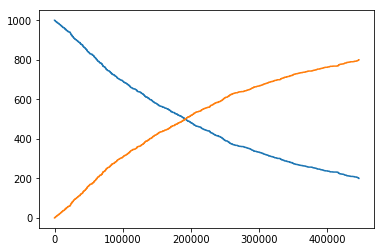

In [50]:
# PART 1 ARRAY

n = 1000
Tl = np.ones(n)
Pb = np.zeros(n)

tau = 3052*60

t = 0

p = 1.-2.**(-1./(3052*60))

Res_Tl = np.array([])
time = np.array([])

while Tl.sum()>200:
    Tl_prob = np.random.rand(n)
    
    for i in range(len(Tl_prob)):
        if (Tl_prob[i]<p) & (Tl[i] != 0):
            Tl[i] = 0
            Pb[i] = 1

    Res_Tl = np.append(Res_Tl, Tl.sum() )
    t += 1
    time = np.append(time, t)

Res_Pb = Res_Tl.copy()

for i in np.arange(len(Res_Tl)):
    Res_Pb[i] = 1000 - Res_Tl[i]
    
#print(time)
#print(Res_Ti.shape)
#print(Res_Pb)
print("The process lasts: ", t/86400, " days.")

plt.plot(np.array(time), np.array(Res_Tl))
plt.plot(np.array(time), np.array(Res_Pb))

2023994
The process lasts:  23.425856481481482  days.


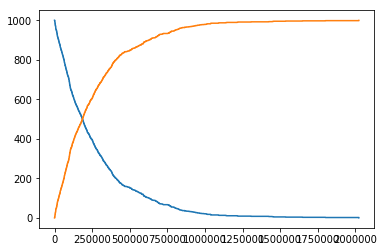

In [2]:
#marcoagnolon rosicaaaaaaa
from numba import jit


@jit(nopython = True, parallel = True)
def evo(Ain, Bin, tau):
    Aevo = []
    Bevo = []
    A = Ain
    B = 0
    while A>1:
        for i in range(A):
            if (np.random.rand()) < (1.-2.**(-1./(3052*60))):
                A-=1
                B+=1
        Aevo.append(A)
        Bevo.append(B)
    return Aevo, Bevo
        
    
Tl = 1000
Pb = 0
timestep = 1
tau = 3052*60

resTl, resPb = evo(Tl, Pb, tau)

time = np.arange(len(resTl))
plt.plot(np.array(time), np.array(resTl))
plt.plot(np.array(time), np.array(resPb))

print(len(resTl))
print("The process lasts: ", len(resTl)/86400, " days.")

The process lasts:  4.884039351851852  days.


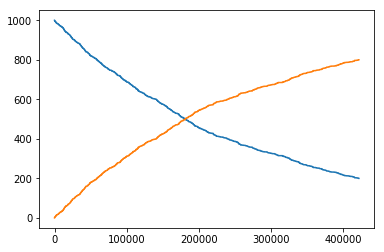

In [51]:
# PART 1 COUNTER

# PART 1

n = 1000

tau = 3052*60

Ti = n

t = 0

p = 1.-2.**(-1./(3052*60))

Res_Tl = np.array([])
time = np.array([])

while Tl>200:
    for i in range(Ti):
        if np.random.rand()<p:
            Tl -= 1

    Res_Tl = np.append(Res_Tl, Tl)
    t += 1
    time = np.append(time, t)

Res_Pb = Res_Tl.copy()

for i in np.arange(len(Res_Tl)):
    Res_Pb[i] = 1000 - Res_Tl[i]
    
#print(time)
#print(Res_Ti.shape)
#print(Res_Pb)
print("The process lasts: ", t/86400, " days.")

plt.plot(np.array(time), np.array(Res_Tl))
plt.plot(np.array(time), np.array(Res_Pb))

1000
0 1


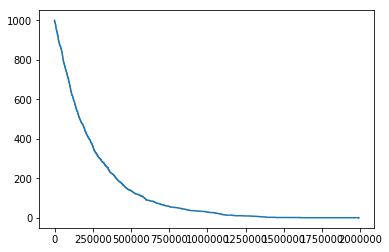

In [6]:
# PART 2

n = 1000

tau = 3052*60

p = 1.-2.**(-1./(3052*60))

# to evaluate the time starting from the probability
# @jit(nopython = True, parallel = True)
def prob_inverse(unif, τ = 3052*60, prob = 1.-2.**(-1./(3052*60)) ):
    return -τ*np.log(unif)/np.log(2)


samples = np.random.rand(n)

#print(samples)

times = np.round(prob_inverse(samples))

#print(times)

l = int(times.max() + 1)

time_axis = np.arange(l)

res = np.zeros(l)

cont = len(times)
print(len(times))
i = 0
while i < l:
    if i in times:
        cont -= len(times[times == i])
    res[i] = cont
    i += 1

print(cont)
    
plt.plot(time_axis, res)

2\. **Rutherford Scattering**

The scattering angle $\theta$ of $\alpha$ particles hitting a positively charged nucleus of a Gold atom ($Z=79$) follows the rule:

$$
\tan{\frac{1}{2} \theta} = \frac{Z e^2} {2\pi \epsilon_0 E b}
$$

where $E=7.7$ MeV and $b$ beam is the impact parameter. The beam is represented by a 2D gaussian distribution with $\sigma=a_0/100$ for both coordinates ($a_0$ being the Bohr radius). Assume 1 million $\alpha$ particles are shot on the gold atom.

Compute the fraction of particles that "bounce back",i.e. those particle whose scattering angle is greater than $\pi/2$ (which set a condition on the impact parameter $b$)

In [7]:
n_alfa = 1000000

Z_gold = 79

e_charge = 1.609*10**(-19)

E = 7.7 * 1e6 * (e_charge)      # Energy in Joule

a_0 = 0.529*10**(-9)             # Bohr radius in meter

ε_0 = 8.89*10**(-12)

σ = a_0/100.

n_bounced = 0

norm = np.random.normal

for i in range(n_alfa):
    b = np.sqrt(norm(scale=σ)**2 + norm(scale=σ)**2)
    theta = 2*np.arctan((Z_gold*(e_charge**2))/(2*np.pi*ε_0*E*b))
    if theta>(np.pi/2):
        n_bounced += 1

n_passed = n_alfa - n_bounced

print(n_bounced)

12


In [23]:
# More correct gaussian generator

n_alfa = 1000000

Z_gold = 79

e_charge = 1.609*10**(-19)

E = 7.7 * 1e6 * (e_charge)      # Energy in Joule

a_0 = 0.529*10**(-9)             # Bohr radius in meter

ε_0 = 8.89*10**(-12)

σ = a_0/100.

u1 = np.random.random(n_alfa)
u2 = np.random.random(n_alfa)
r_squared = -2*(σ**2)*np.log(u1)    # N.B.: log(z) o log(1-z) sono la stessa cosa perché z è estratto in [0, 1)
b = np.sqrt(r_squared)

theta = 2*np.arctan((Z_gold*(e_charge**2))/(2*np.pi*ε_0*E*b))

n_bounced = len(theta[theta>np.pi/2])

print(n_bounced/n_alfa)

1.8e-05


3\. **Monte Carlo integration: hit/miss vs mean value method**

Consider the function 

$$f(x) =\sin^2{\left(\frac{1}{x(2-x)}\right)}$$

* Compute the integral of $f(x)$ between 0 and 2 with the hit/miss method. Evaluate the error of your estimate
* Repeat the integral with the mean value method. Evaluate the error and compare it with the previous one

The estimated result is:  1.45408
The estimated error is:  0.0030799999999999716


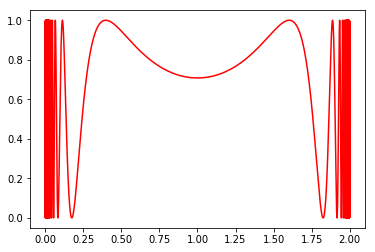

In [17]:
# HIT/MISS METHOD

def f(x):
    return (np.sin(1/(x*(2-x))))**2

true_result = 1.451

x=np.linspace(0.00001,1.99999,100000)
plt.plot(x,f(x),'r-')

N=100000
count=0
for i in range(N):
    x=2*np.random.random()
    y=np.random.random()
    if y<f(x): count+=1
I=2*count/N
print("The estimated result is: ", I)
print("The estimated error is: ", np.abs(I-true_result))

In [18]:
# MEAN VALUE METHOD
N = 1000000
a, b = 0, 2
x = 2*np.random.random(N)
I = (b-a)*(f(x)).sum()/N
print("The estimated result is: ", I)
print("The estimated error is: ", np.abs(I-true_result))

The estimated result is:  1.451045494319103
The estimated error is:  4.5494319102834524e-05


4\. **Monte Carlo integration in high dimension**

* Start of by computing the area of a circle of unit radius, by integrating the function 

$$
f(x,y)=
\left\{
\begin{array}{ll}
      1 & x^2+y^2\le 1 \\
      0 & {\rm elsewhere}
\end{array} 
\right.
$$

* Generalize the result for a 10D sphere



In [27]:
# Primo punto: circonferenza in dim=2
N = 2**20
x, y = np.random.uniform(size=N), np.random.uniform(size=N)

I = (x**2 + y**2)

d = 2

print(len((2**d)*I[I<1])/N)    # Devo moltiplicae per 2^dim poiché estraggo solamente nel primo quadrante

0.7848682403564453


In [30]:
# Secondo punto: volume d-dimensionale di una sfera di raggio 1
N = 2**20
d = 10
I = 0
x = np.zeros(d)
for i in range(N):
    for j in range(len(x)):
        x[j] = np.random.uniform()
    if (x**2).sum()<1:
        I+=1

print(I*(2**10)/N)

2.486328125


5\. **Monte Carlo integration with importance sampling** 

Calculate the value of the integral:

$$
I=\int_0^1 \frac{x^{-1/2}}{e^x+1} dx
$$

using the importance sampling method with $w(x)=1/\sqrt{x}$. You should get a result about 0.84

In [8]:
N = 2**25

def f(x):
    return 1/(np.sqrt(x) * (np.exp(x)+1))
def g(x):
#    return 1/np.sqrt(x)
#    return 1
#    return (2-x)
    return 1/(x**(1/3))

x = np.random.random(size=N)
I = np.sum(f(x)/g(x)) * 1.5 / N
print("The estimated result is: ", I)
print("The error is: ", np.abs(I-0.84))

The estimated result is:  0.7030461787922337
The error is:  0.13695382120776622
